<a href="https://colab.research.google.com/github/Eukio/CS4372HW4/blob/main/CS4372_HW4_ETT220002.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Q&A Chatbot on the KJV Bible- HW 4
Eucharist Tan - ETT220002
CS4372
11/21/25

In [ ]:
%%capture
%pip install transformers

In [ ]:
#1. Load imports
from transformers import pipeline
import requests
import json
import torch
from transformers import DistilBertTokenizerFast
from transformers import DistilBertForQuestionAnswering
from transformers import TrainingArguments
from transformers import Trainer
from transformers import AutoTokenizer, AutoModelForQuestionAnswering
from transformers import pipeline
from datasets import load_dataset
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
#2. Set pipeline to question-answering, update parameters
model_name = "distilbert-base-cased-distilled-squad"
qa_pipeline = pipeline("question-answering", model=model_name, tokenizer=model_name, max_seq_len = 512, doc_stride= 128
)




Device set to use cpu


In [ ]:
#3. Load data
text = requests.get("https://www.gutenberg.org/cache/epub/10/pg10.txt").text
context = text[3007:13943]
examples = [
    {
        "context": "What did God create first?",
        "question": "Who created the heaven and the earth?",
         "id": "q1",
        "answers": [{"text": "God", "answer_start": 25}]

    },
    {
        "context": "In the beginning God created the heaven and the earth. And the earth was without form, and void; and darkness was upon the face of the deep. And the Spirit of God moved upon the face of the waters. And God said, Let there be light: and there was light.",
        "id": "q2",
        "question": "What did God create first?",
        "answers": [{"text": "the heaven and the earth", "answer_start": 37}]
    },
    {
        "context": "And God said, Let there be light: and there was light.",
        "id": "q3",
        "question": "What did God create after speaking?",
        "answers": [{"text": "light", "answer_start": 300}]
    },
    {
        "context": "And God saw the light, that it was good: and God divided the light from the darkness.",
        "id": "q4",
        "question": "What did God divide?",
        "answers": [{"text": "the light from the darkness", "answer_start": 341}]
    },
    {
        "context": "And God called the light Day, and the darkness he called Night.",
        "id": "q5",
        "question": "What did God call the light?",
        "answers": [{"text": "Day", "answer_start": 403}]
    },
    {
        "context": "And God called the light Day, and the darkness he called Night.",
        "id": "q6",
        "question": "What did God call the darkness?",
        "answers": [{"text": "Night", "answer_start": 435}]
    },
    {
        "context": "And God said, Let the earth bring forth grass, the herb yielding seed, and the fruit tree yielding fruit after his kind.",
        "id": "q7",
        "question": "What did God command the earth to bring forth?",
        "answers": [{"text": "grass, the herb yielding seed, and the fruit tree yielding fruit", "answer_start": 1357}]
    },
    {
        "context": "And the earth brought forth grass, and herb yielding seed after his kind, and the tree yielding fruit, whose seed was in itself, after his kind.",
        "id": "q8",
        "question": "Did the earth obey God's command?",
        "answers": [{"text": "And the earth brought forth grass, and herb yielding seed after his kind, and the tree yielding fruit", "answer_start": 1329}]
    },
    {
        "context": "And God said, Let us make man in our image, after our likeness: and let them have dominion over the fish of the sea, and over the fowl of the air.",
        "id": "q9",
        "question": "In whose image did God make man?",
        "answers": [{"text": "our image", "answer_start": 3227}]
    },
    {
        "context": "And God said, Let us make man in our image, after our likeness: and let them have dominion over the fish of the sea, and over the fowl of the air.",
        "id": "q10",
        "question": "What dominion was given to man?",
        "answers": [{"text": "over the fish of the sea, and over the fowl of the air", "answer_start": 3292}]
    },
    {
        "context": "And the LORD God caused a deep sleep to fall upon Adam, and he slept: and he took one of his ribs, and made a woman.",
        "id": "q11",
        "question": "How was Eve created?",
        "answers": [{"text": "he took one of his ribs, and made a woman", "answer_start": 7160}]
    },
    {
        "context": "And the LORD God brought her unto the man.",
        "id": "q12",
        "question": "Who was brought to Adam?",
        "answers": [{"text": "her", "answer_start": 10656}]
    },
    {
        "context": "And the LORD God planted a garden eastward in Eden; and there he put the man whom he had formed.",
        "id": "q13",
        "question": "Where did God plant the garden?",
        "answers": [{"text": "eastward in Eden", "answer_start": 5361}]
    },
    {
        "context": "And the LORD God commanded the man, saying, Of every tree of the garden thou mayest freely eat.",
        "id": "q14",
        "question": "What could man eat freely?",
        "answers": [{"text": "Every tree of the garden", "answer_start": 6362}]
    },
    {
        "context": "But of the tree of the knowledge of good and evil, thou shalt not eat of it.",
        "id": "q15",
        "question": "Which tree was forbidden?",
        "answers": [{"text": "the tree of the knowledge of good and evil", "answer_start": 6424}]
    },
    {
        "context": "For in the day that thou eatest thereof thou shalt surely die.",
        "id": "q16",
        "question": "What would happen if the man ate the forbidden fruit?",
        "answers": [{"text": "thou shalt surely die", "answer_start": 6536}]
    },
    {
        "context": "Now the serpent was more subtil than any beast of the field which the LORD God had made. And he said unto the woman, Yea, hath God said, Ye shall not eat of every tree of the garden?",
        "id": "q17",
        "question": "Who spoke to the woman?",
        "answers": [{"text": "the serpent", "answer_start": 8123}]
    },
    {
        "context": "And the woman said unto the serpent, We may eat of the fruit of the trees of the garden.",
        "id": "q18",
        "question": "What did the woman say they could eat?",
        "answers": [{"text": "the fruit of the trees of the garden", "answer_start": 7908}]
    },
    {
        "context": "And the LORD God said unto the woman, I will greatly multiply thy sorrow and thy conception; in sorrow thou shalt bring forth children.",
        "id": "q19",
        "question": "What punishment was given to the woman?",
        "answers": [{"text": "greatly multiply thy sorrow and thy conception", "answer_start": 9899}]
    },
    {
        "context": "And unto Adam he said, Cursed is the ground for thy sake; in sorrow shalt thou eat of it all the days of thy life.",
        "id": "q20",
        "question": "What was Adam's punishment?",
        "answers": [{"text": "Cursed is the ground for thy sake; in sorrow shalt thou eat of it all the days of thy life", "answer_start":10248}]
    }
]



In [ ]:
#4. Run Question and Answering System
scores = []
for i in range(0,len(examples)):
    outputs = qa_pipeline(question=examples[i]['question'], context=context)
    scores.append(outputs['score'])
    print(f"Question {examples[i]['id']}: {examples[i]['question']}")
    print(f"Answer: {outputs}")

Question q1: Who created the heaven and the earth?
Answer: {'score': 0.9905506955092278, 'start': 25, 'end': 28, 'answer': 'God'}
Question q2: What did God create first?
Answer: {'score': 0.46584221720695496, 'start': 41, 'end': 61, 'answer': 'heaven and the earth'}
Question q3: What did God create after speaking?
Answer: {'score': 0.45134109258651733, 'start': 41, 'end': 61, 'answer': 'heaven and the earth'}
Question q4: What did God divide?
Answer: {'score': 0.45815195845807466, 'start': 3665, 'end': 3670, 'answer': 'earth'}
Question q5: What did God call the light?
Answer: {'score': 0.43035200238227844, 'start': 8949, 'end': 8953, 'answer': 'Adam'}
Question q6: What did God call the darkness?
Answer: {'score': 0.9542741775512695, 'start': 435, 'end': 440, 'answer': 'Night'}
Question q7: What did God command the earth to bring forth?
Answer: {'score': 0.5589969754219055, 'start': 10922, 'end': 10930, 'answer': 'his hand'}
Question q8: Did the earth obey God's command?
Answer: {'score

In [ ]:
#5. Output score for run
for score in scores:
    print(score)


0.9905506955092278
0.46584221720695496
0.45134109258651733
0.45815195845807466
0.43035200238227844
0.9542741775512695
0.5589969754219055
0.06205064430832863
0.42376093316244123
0.3627912700176239
0.03596576303243637
0.021082407794892788
1.5208378434181213
0.33532094955444336
0.2614683508872986
0.16857163608074188
0.38984068610176337
0.2926988026156323
0.08171927183866501
0.017751071602106094


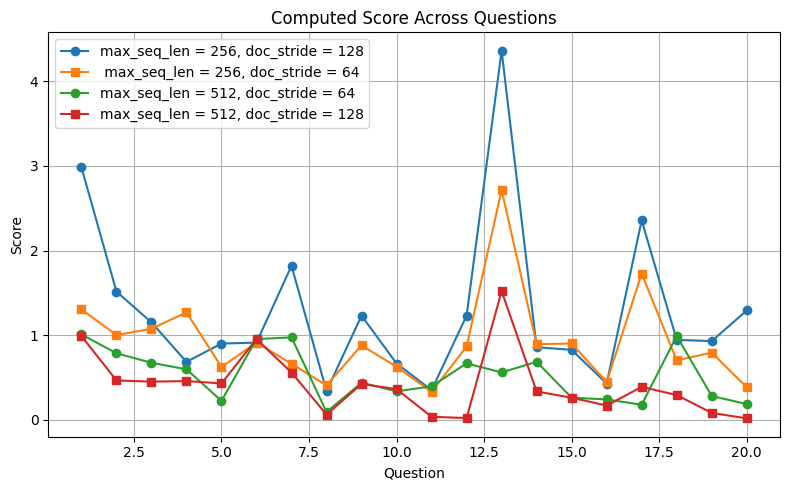

In [ ]:
# 6. Plot results

# max_seq_len = 256, doc_stride = 128
scores_256_128 = [
    2.9854396974899373, 1.5160815834824461, 1.1515105068683624, 0.6848162841051817,
    0.9011569149879506, 0.9126578569412231, 1.820531886187382, 0.34006330370903015,
    1.2314173532577115, 0.6658522486686707, 0.35098668932914734, 1.2314750832447316,
    4.362312436103821, 0.8576278388500214, 0.827372488565743, 0.42912517860531807,
    2.3575606994418195, 0.9452191404998302, 0.9304544186452404, 1.2923326833406463
]

# max_seq_len = 256, doc_stride = 64
scores_256_64 = [
    1.3061853826216065, 1.0015856623649597, 1.076655626296997, 1.2695578932762146,
    0.6250943765044212, 0.9126578569412231, 0.662021616473794, 0.4082005340605974,
    0.8803021243086278, 0.6268325671553612, 0.3299817442893982, 0.8672391479922226,
    2.7154658436775208, 0.8930922746658325, 0.9024759508902207, 0.444885935743514,
    1.7291087723460805, 0.7023422400015988, 0.794145405292511, 0.38485047221183777
]

# max_seq_len = 512, doc_stride = 64
scores_512_64 = [
    1.0090392878900047, 0.7871127128601074, 0.674318253993988, 0.5972632169723511,
    0.22456641495227814, 0.9542741775512695, 0.9747534394264221, 0.09240176528692245,
    0.43888272540061735, 0.3371354639530182, 0.3956613540649414, 0.6674882769584656,
    0.5603270789630699, 0.6861294150436947, 0.2614683508872986, 0.24172405898571014,
    0.17850490175078448, 0.9908480048179626, 0.28191983699798584, 0.18602825701236725
]

# max_seq_len = 512, doc_stride = 128
scores_512_128 = [
    0.9905506955092278, 0.46584221720695496, 0.45134109258651733, 0.45815195845807466,
    0.43035200238227844, 0.9542741775512695, 0.5589969754219055, 0.06205064430832863,
    0.42376093316244123, 0.3627912700176239, 0.03596576303243637, 0.021082407794892788,
    1.5208378434181213, 0.33532094955444336, 0.2614683508872986, 0.16857163608074188,
    0.38984068610176337, 0.2926988026156323, 0.08171927183866501, 0.017751071602106094
]

question_ids = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]

plt.figure(figsize=(8, 5))
plt.plot(question_ids, scores_256_128, label='max_seq_len = 256, doc_stride = 128', marker='o')
plt.plot(question_ids, scores_256_64, label=' max_seq_len = 256, doc_stride = 64', marker='s')
plt.plot(question_ids, scores_512_64, label='max_seq_len = 512, doc_stride = 64', marker='o')
plt.plot(question_ids, scores_512_128, label='max_seq_len = 512, doc_stride = 128', marker='s')
plt.xlabel('Question')
plt.ylabel('Score')
plt.title('Computed Score Across Questions')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

